In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
# universal path
csv_path = os.path.join('..','raw_data','churn.csv')

# set dataset into 'data'
data = pd.read_csv(csv_path)

In [4]:
data.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [5]:
# Check number of rows before removing duplicates
len(data)

# Compute the number of duplicated rows
data.duplicated().sum()

0

In [25]:
# NaN percentage for each column
data.isnull().sum().sort_values(ascending=False)/len(data) 

churn                         0.0
accountlength                 0.0
totalintlcharge               0.0
totalintlcalls                0.0
totalintlminutes              0.0
totalnightcharge              0.0
totalnightcalls               0.0
totalnightminutes             0.0
totalevecharge                0.0
totalevecalls                 0.0
totaleveminutes               0.0
totaldaycharge                0.0
totaldaycalls                 0.0
totaldayminutes               0.0
numbervmailmessages           0.0
voicemailplan                 0.0
internationalplan             0.0
numbercustomerservicecalls    0.0
dtype: float64

In [7]:
# categorical to regression, No = 0, Yes = 1
le = LabelEncoder()

data['churn'] = le.fit_transform(data['churn'])
data['internationalplan'] = le.fit_transform(data['internationalplan'])
data['voicemailplan'] = le.fit_transform(data['voicemailplan'])

In [8]:
data

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,50,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
4996,1,152,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
4997,0,61,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
4998,0,109,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0


In [26]:
data.corr()['churn'].sort_values()

voicemailplan                -0.110698
numbervmailmessages          -0.097633
totalintlcalls               -0.046893
totalnightcalls              -0.006986
totalevecalls                -0.006284
totaldaycalls                 0.016130
accountlength                 0.021203
totalnightcharge              0.045673
totalnightminutes             0.045677
totalintlcharge               0.063275
totalintlminutes              0.063285
totalevecharge                0.089282
totaleveminutes               0.089288
totaldaycharge                0.207700
totaldayminutes               0.207705
numbercustomerservicecalls    0.212564
internationalplan             0.259123
churn                         1.000000
Name: churn, dtype: float64

<AxesSubplot:xlabel='totaldayminutes', ylabel='churn'>

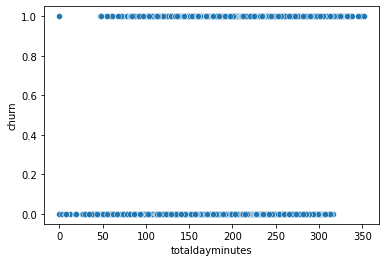

In [31]:
sns.scatterplot(x='totaldayminutes', y='churn', data=data)

In [20]:
# Single data where day calls are 0(zeros)
# In consideration of dropping (outlier?)
# Keep for now, since it is possible for such a customer to have such calls.
data[(data['totaldayminutes'] == 0) & (data['churn'] > 0)]

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
1345,1,98,0,0,0,0.0,0,0.0,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4


In [32]:
# setting X and y
X = data.drop(columns = 'churn')
y = data['churn']

In [16]:
# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)